In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

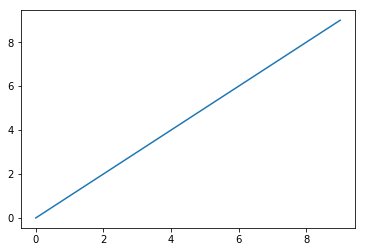

In [4]:
data=np.arange(10)
plt.plot(data)

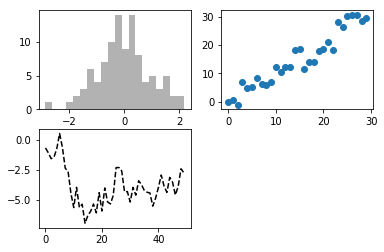

In [15]:
# 圖及子圖
# matplotlib的圖存於figure物件中
fig=plt.figure() # 建立新的圖

# 不能直接畫圖，必須透過add_subplot()建立
ax1=fig.add_subplot(2,2,1) #建立2*2=4張子圖,編號=1,依此類推
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)

plt.plot(np.random.randn(50).cumsum(),'k--') # 執行繪圖命令時，會在最近使用的圖(最後一個圖)作畫 'k--':黑色虛線樣式
ax1.hist(np.random.randn(100),bins=20,color='k',alpha=0.3)
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029349916390>,
      dtype=object)

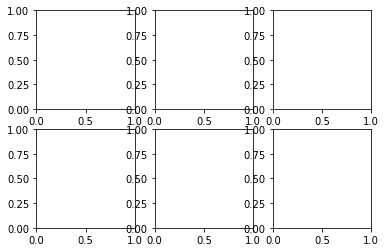

In [198]:
# 一次建立多個子圖
fig,axes=plt.subplots(2,3)
axes # 可用axes[0,1]做陣列索引選取哪一張子圖

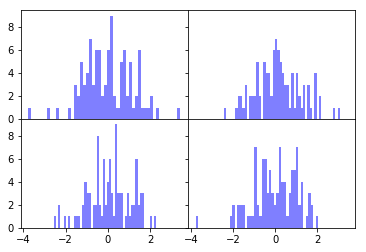

In [45]:
# 調整子圖間的留白
fig,axes=plt.subplots(2,2,sharex=True,sharey=True) # sharex/y:共用x/y軸比例
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(100),bins=50,color='b',alpha=0.5)
plt.subplots_adjust(wspace=0,hspace=0) # wspace/hspace長寬留白空間 

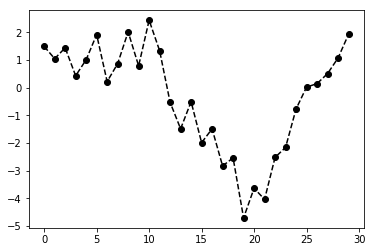

In [35]:
# 調整色彩、線條及樣式
# axes.plot(x,y,'g--') or axes.plot(x,y,linestyle='--',color='g')

from numpy.random import randn
plt.plot(randn(30).cumsum(),color='k',linestyle='dashed',marker='o')


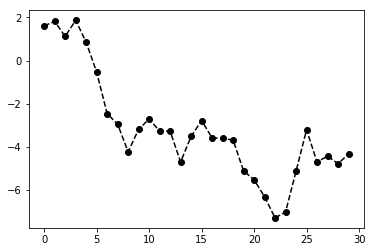

In [36]:
plt.plot(randn(30).cumsum(),'ko--') # 兩個寫法相同

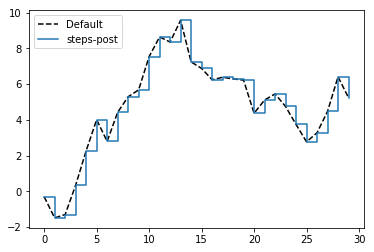

In [49]:
# 折線圖drawstyle
data=randn(30).cumsum()
plt.plot(data,'k--',label='Default')
plt.plot(data,drawstyle='steps-post',label='steps-post')
plt.legend(loc='upper left') # 建立圖例位置

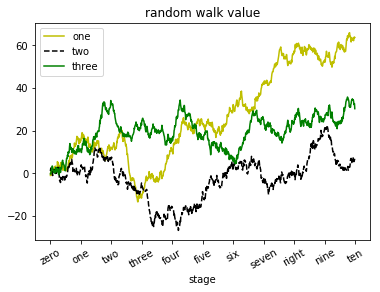

In [115]:
# 刻度、標籤和圖例
# 不帶參數呼叫會回傳目前參數值，plt.xlim()
# 帶參數呼叫會設定新的參數值，plt.xlim([0,10]) x軸範圍從0到10

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum(),'y',label='one')
ax.set_title('random walk value') # set title
ax.set_xticks([0,100,200,300,400,500,600,700,800,900,1000]) # 設定刻度
# 設定刻度名稱
ax.set_xticklabels(['zero','one','two','three','four','five','six','seven','right','nine','ten'],rotation=30,fontsize='medium') 
ax.set_xlabel('stage')

# add other graph
ax.plot(np.random.randn(1000).cumsum(),'k--',label='two')
ax.plot(np.random.randn(1000).cumsum(),'g',label='three')

ax.legend(loc='best') # 自動放在最佳位置

In [75]:
# example from spx
data=pd.read_csv('./examples/spx.csv',index_col=0,parse_dates=True)
data[:10]
spx=data['SPX']
spx[:10]

1990-02-01    328.79
1990-02-02    330.92
1990-02-05    331.85
1990-02-06    329.66
1990-02-07    333.75
1990-02-08    332.96
1990-02-09    333.62
1990-02-12    330.08
1990-02-13    331.02
1990-02-14    332.01
Name: SPX, dtype: float64

Text(0.5, 1.0, 'important dates in the 2008-2009 financial crysis')

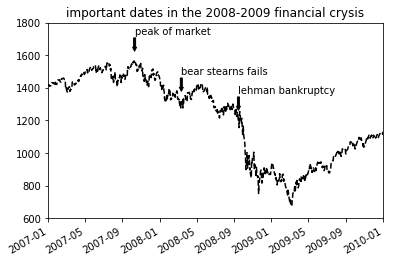

In [95]:
# 注釋與畫圖
# 在指定座標加入文字
from datetime import datetime
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

spx.plot(style='k--')

crisis_data=[(datetime(2007,10,11),'peak of market'),
             (datetime(2008,3,12),'bear stearns fails'),
             (datetime(2008,9,15),'lehman bankruptcy')]

for date,note in crisis_data:
    ax.annotate(note,xy=(date,spx.asof(date)+70),xytext=(date,spx.asof(date)+225), # 加上去的數字只是為了設定箭頭與圖的距離
                arrowprops=dict(facecolor='black',headwidth=4,width=2,headlength=4), # 設定箭頭大小及樣式
                horizontalalignment='left',verticalalignment='top')

ax.set_xlim(['1/1/2007','1/1/2010'])
ax.set_ylim([600,1800])
ax.set_title('important dates in the 2008-2009 financial crysis')


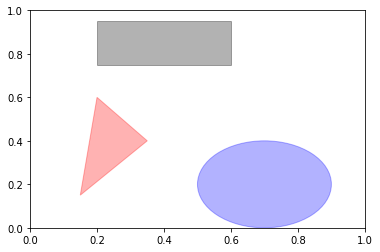

In [109]:
# matplotlip代表長兼形狀的物件:patches
# 先建立shp,再使用ax.add_patch(shp)
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

rect=plt.Rectangle((0.2,0.75),0.4,0.2,color='k',alpha=0.3) # (0.2,0.75)=起始點 0.4=length 0.2=width 
circ=plt.Circle((0.7,0.2),0.2,color='b',alpha=0.3) # (0.7,0.2)=圓心 0.2=半徑
pgon=plt.Polygon([[0.15,0.15],[0.35,0.4],[0.2,0.6]],color='r',alpha=0.3) # 3個頂點座標

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

# 把圖片存檔
# plt.savefig('檔名',dpi=xxx,format='檔案格式',...)
plt.savefig('test.jpg',format='jpg')

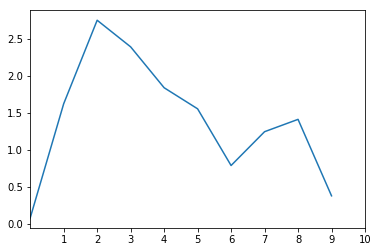

In [140]:
# 用pandas/seaborn繪圖
# 折線圖
s=pd.Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10)) # index use as x軸刻度,可以自行修改
s.plot(use_index=False,xticks=[1,2,3,4,5,6,7,8,9,10])


In [186]:
df=pd.DataFrame(np.random.randn(10,4).cumsum(0),columns=['A','B','C','D'],index=np.arange(0,100,10))
df
# cumsum(0)把原本len為40的array變為10(4*10)

,A,B,C,D
0,1.199976,0.391987,1.034994,-1.133145
10,0.827315,0.499082,0.878684,-1.046081
20,1.159030,-0.553848,-0.118015,-1.564816
30,2.693218,0.313377,0.842231,-0.998616
40,3.509810,1.346254,1.140099,0.580066
50,2.390203,2.747348,2.235621,-0.006231
60,2.488271,3.564591,1.520410,-1.022732
70,1.695097,4.340124,1.882041,-2.711159
80,-0.161088,5.240013,2.692005,-2.278763
90,-0.142991,5.015283,2.757169,-2.733752


In [187]:
np.random.randn(10,4).cumsum() #len=40

array([ 1.59418306,  1.13006732,  1.03596704,  0.77923511,  0.20518477,
       -0.70226981,  0.36376776,  0.60179757,  1.93197898,  3.44204383,
        3.68364502,  3.15901855,  2.68682145,  2.26733392,  1.65054629,
        1.96572556,  0.66833007,  0.34606999,  0.29794659, -0.2854983 ,
       -0.73631702, -0.75372079, -0.05390396, -0.04968004, -1.02278218,
       -2.34932322, -2.15782371, -1.53587645, -0.15827842,  0.49835666,
       -0.43241068, -0.11512089,  0.57218046,  0.10981345, -0.81866522,
       -0.07369961, -0.70230139, -2.22381865, -2.71040288, -1.86834093])

In [188]:
np.random.randn(10,4).cumsum(0) # len=10

array([[ 0.25401095,  0.24924398, -0.64088606, -0.05814581],
       [ 1.38185716, -0.51374159,  0.07115464,  0.81719845],
       [ 1.41240676, -1.13654218,  0.06831086,  1.23692996],
       [ 2.25621312, -2.42642152, -1.48563851,  1.69019171],
       [ 2.74732185, -3.41592466, -0.67003133,  1.88771328],
       [ 4.78794444, -2.72604649, -0.73989434,  0.79710136],
       [ 5.66396545, -2.38907013, -1.00134691,  0.16468135],
       [ 5.7841863 , -2.3634077 , -1.00940404, -0.0631004 ],
       [ 5.84133356, -2.78316461,  0.87226427,  1.58347972],
       [ 7.44244243, -3.94798329,  0.67118101,  1.76537369]])

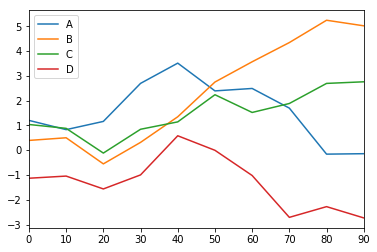

In [189]:
df.plot()

[]

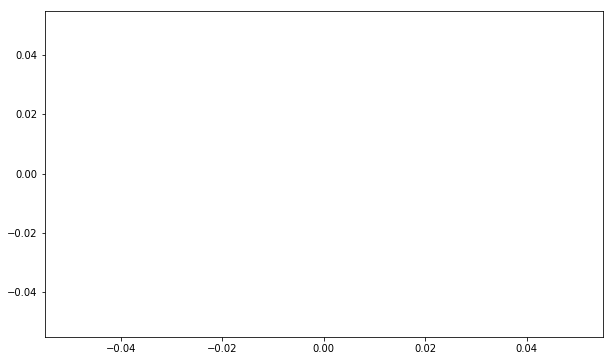

In [216]:
# 改變matplotlib預設值 
plt.rcParams["figure.figsize"] = (10, 6)
plt.plot()

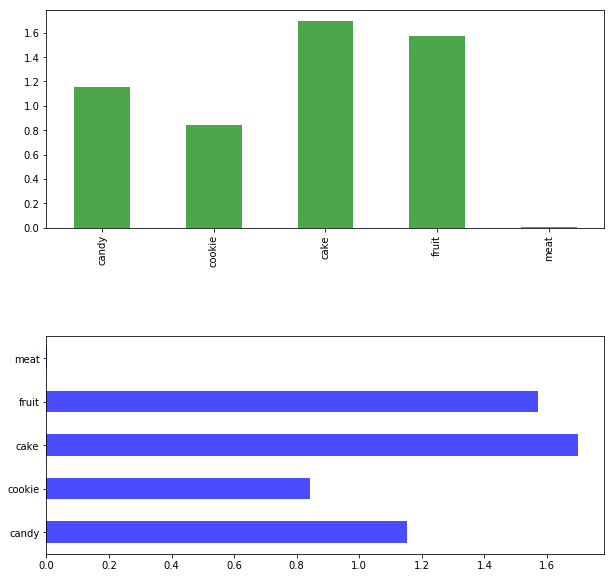

In [221]:
# 長條圖 series
plt.rcParams["figure.figsize"] = (10, 10)
fig,axes=plt.subplots(2,1)
data=pd.Series(abs(np.random.randn(5)),index=['candy','cookie','cake','fruit','meat'])

data.plot.bar(ax=axes[0],color='g',alpha=0.7)
data.plot.barh(ax=axes[1],color='b',alpha=0.7)
plt.subplots_adjust(wspace=50,hspace=0.5)

In [230]:
# 長條圖 dataframe
df=pd.DataFrame(abs(np.random.randn(4,5)+5),columns=['candy','cookie','cake','fruit','meat'])
df

,candy,cookie,cake,fruit,meat
0,5.227419,4.367857,4.070950,5.433078,5.278563
1,5.514439,5.195000,6.475259,4.738304,6.056584
2,3.295663,6.700277,5.668118,4.338468,5.372500
3,4.118694,3.202815,3.838597,4.635028,5.597529


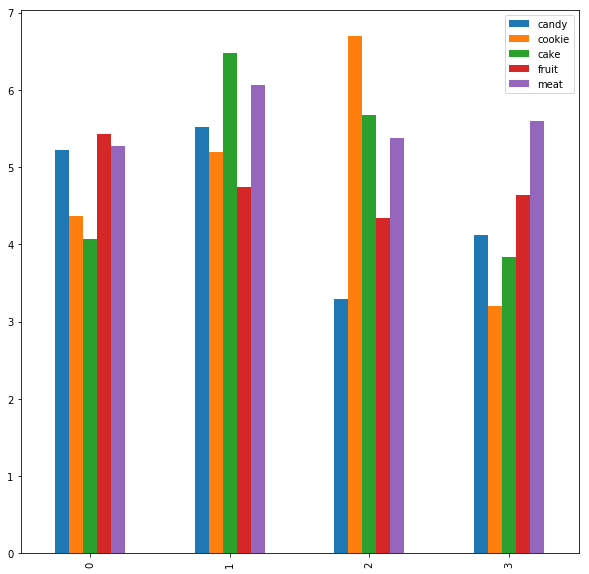

In [231]:
df.plot.bar()

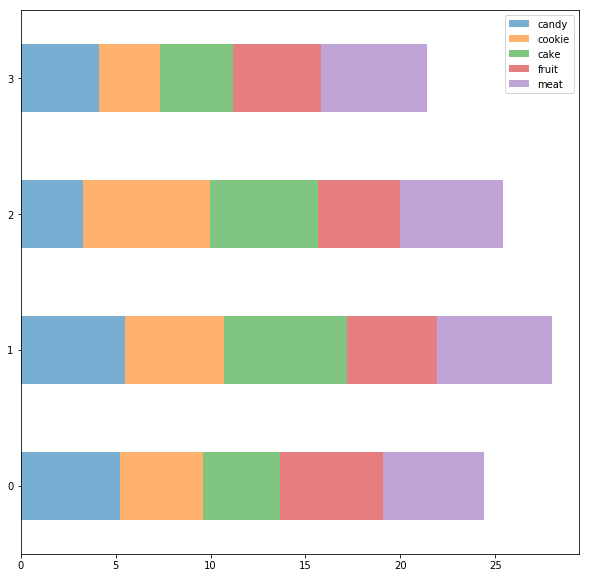

In [234]:
df.plot.barh(stacked=True,alpha=0.6)

In [5]:
# example
tips=pd.read_csv('./examples/tips.csv')
tips[:5]

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


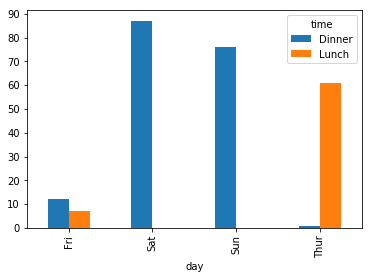

In [6]:
# crosstab,計算分組出現頻率
# 找出星期幾與用餐時段關係
day_size=pd.crosstab(tips['day'],tips['time'])
day_size.plot.bar(yticks=np.arange(0,100,10))


In [7]:
# 用百分比表示用餐人數及星期幾的關係
party_count=pd.crosstab(tips['day'],tips['size'])
party_count

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [8]:
party_count.sum(1) # 星期幾的加總

day
Fri     19
Sat     87
Sun     76
Thur    62
dtype: int64

In [9]:
party_count.sum(0) # 人數加總

size
1      4
2    156
3     38
4     37
5      5
6      4
dtype: int64

In [10]:
party_count=party_count.div(party_count.sum(1),axis=0) # 每一行/party_count.sum(1)
party_count

size,1,2,3,4,5,6
day,,,,,,
Fri,0.052632,0.842105,0.052632,0.052632,0.000000,0.000000
Sat,0.022989,0.609195,0.206897,0.149425,0.011494,0.000000
Sun,0.000000,0.513158,0.197368,0.236842,0.039474,0.013158
Thur,0.016129,0.774194,0.064516,0.080645,0.016129,0.048387


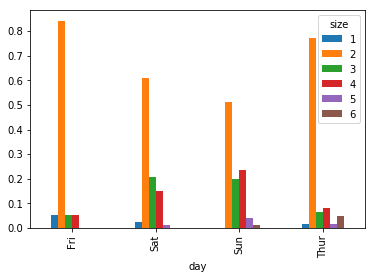

In [11]:
party_count.plot.bar()

In [12]:
# seaborn
# 顯示每天的小費百分比
tips[:5]

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [13]:
tips['tip_%']=tips['tip']/(tips['total_bill']-tips['tip'])
tips[:5]

,total_bill,tip,smoker,day,time,size,tip_%
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


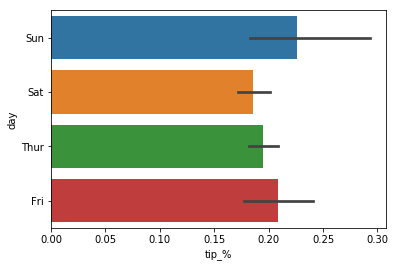

In [14]:
sns.barplot(x='tip_%',y='day',data=tips,orient='h') # data為傳入的dataframe

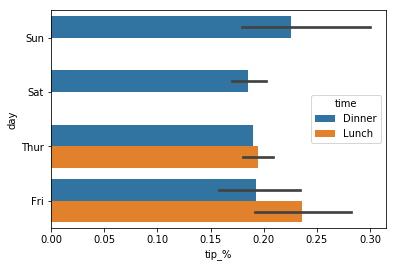

In [15]:
sns.barplot(x='tip_%',y='day',hue='time',data=tips,orient='h') # 星期幾加上午晚餐時段區分小費百分比

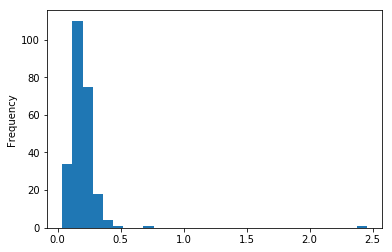

In [16]:
# 直方圖與密度圖 
tips['tip_%'].plot.hist(bins=30) # bins:顯示直方圖涵蓋範圍的寬，較寬的直方圖沒辦法把範圍切分很仔細，但有利於閱讀


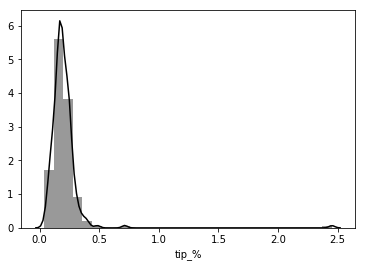

In [17]:
sns.distplot(tips['tip_%'],bins=30,color='k')

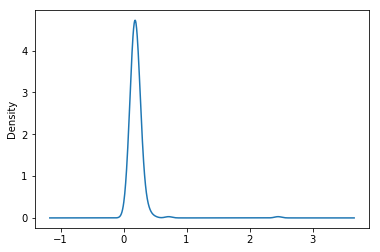

In [18]:
tips['tip_%'].plot.density()

In [19]:
# 散佈圖 觀察二維序列資料
marco=pd.read_csv('./examples/macrodata.csv')
marco[:5]

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [20]:
data=marco[['cpi','m1','tbilrate','unemp']]
data[:5]

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


Text(0.5, 1.0, 'changes in log m1 vs log unemp')

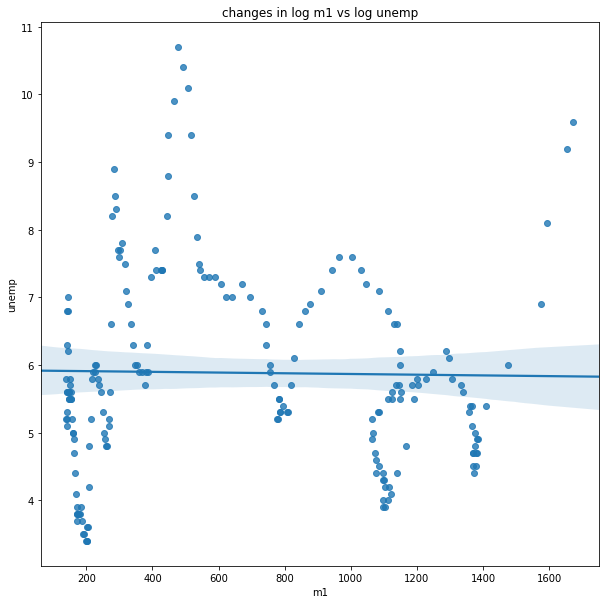

In [21]:
plt.figure(figsize=(10, 10))
sns.regplot('m1','unemp',data=data)
plt.title('changes in log m1 vs log unemp')

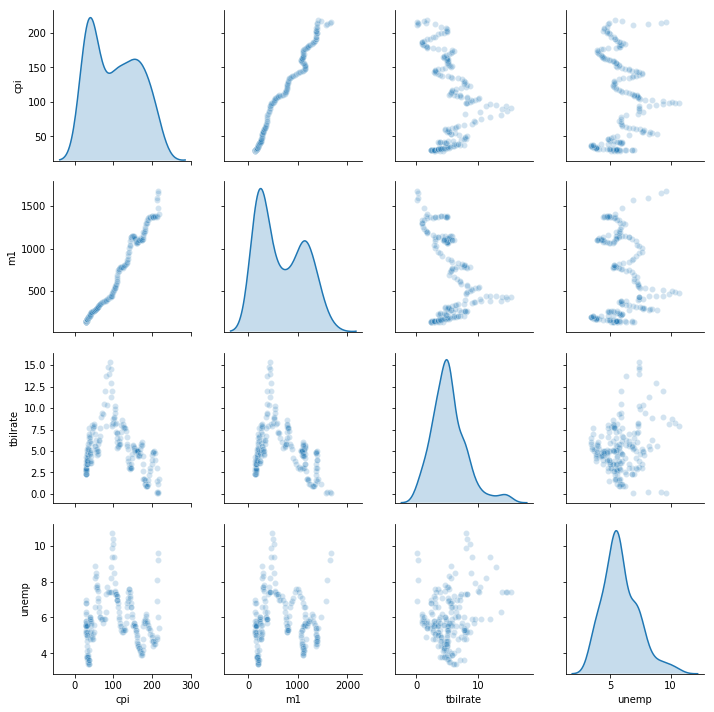

In [22]:
# 散佈圖矩陣
sns.pairplot(data=data,diag_kind='kde',plot_kws={'alpha':0.2})

In [23]:
tips[:5]

,total_bill,tip,smoker,day,time,size,tip_%
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


C:\Users\Mashiro\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


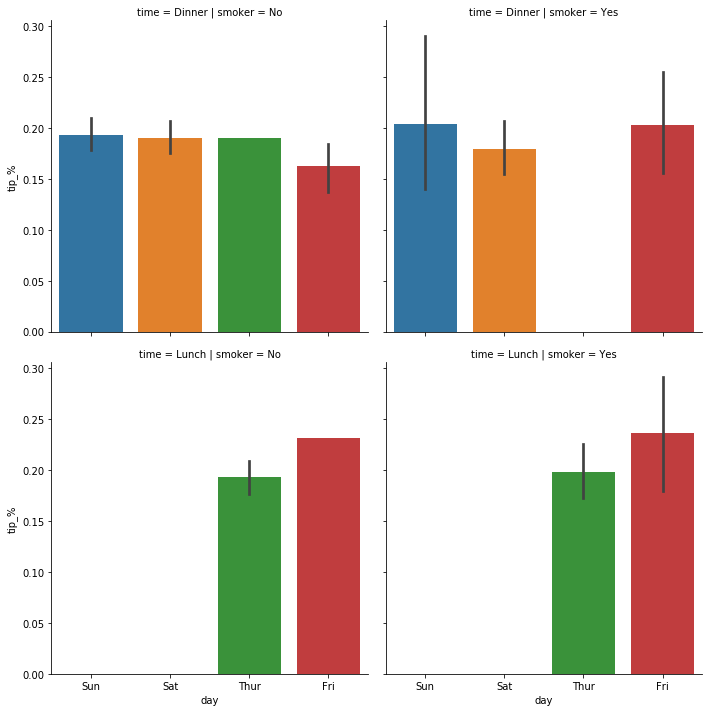

In [24]:
# 層面圖與分組資料,指定依多個變數進行視覺化
# 以星期幾為分組，以時間和抽不抽菸為分層
sns.factorplot(x='day',y='tip_%',row='time',col='smoker',kind='bar',data=tips[tips['tip_%']<1])


C:\Users\Mashiro\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


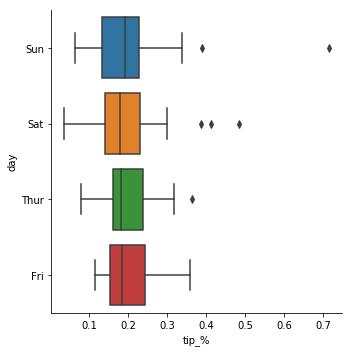

In [26]:
#　箱型圖(顯示四分位數、中位數、離群值)
sns.factorplot(x='tip_%',y='day',kind='box',data=tips[tips['tip_%']<1])